In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [4]:
#Read in our data
overseas = pd.read_excel('../Datasets/cleaned_UK_outliers_removed.xlsx', 'Sheet1')
print(overseas.shape)
overseas.head()

(36274, 13)


,Age,Sex,Year,country,duration,holiday_package,mode_of_transport,place_of_residence,purpose_of_travel,quarter,weighted_visits,weighted_nights,weighted_spend
0,0-15,Female,2014,Austria,4 - 13 Nights,Independent,Air,UK residents,Holiday,Jan-Mar,894.333,6260.331,833518.356
1,16-24,Male,2014,Austria,4 - 13 Nights,Independent,Air,UK residents,Holiday,Jan-Mar,2482.819,16316.920,1625131.051
2,16-24,Female,2014,Austria,1 - 3 Nights,Independent,Air,UK residents,Holiday,Jan-Mar,525.028,1575.084,105005.600
3,16-24,Female,2014,Austria,4 - 13 Nights,Independent,Air,UK residents,Holiday,Jan-Mar,793.577,6445.679,854951.644
4,25-34,Male,2014,Austria,1 - 3 Nights,Independent,Air,UK residents,Holiday,Jan-Mar,864.337,2593.011,151258.975


In [5]:
#Split data into target variable and feature variables

#target variable
labels = overseas['holiday_package']
#Include all other variables as feature variables
features = overseas[['Age','Sex','country','duration','Year','mode_of_transport',
                     'purpose_of_travel','quarter','place_of_residence', 'weighted_visits','weighted_nights', 'weighted_spend']]

print(labels.shape)
print(features.shape)
features.head()

(36274,)
(36274, 12)


,Age,Sex,country,duration,Year,mode_of_transport,purpose_of_travel,quarter,place_of_residence,weighted_visits,weighted_nights,weighted_spend
0,0-15,Female,Austria,4 - 13 Nights,2014,Air,Holiday,Jan-Mar,UK residents,894.333,6260.331,833518.356
1,16-24,Male,Austria,4 - 13 Nights,2014,Air,Holiday,Jan-Mar,UK residents,2482.819,16316.920,1625131.051
2,16-24,Female,Austria,1 - 3 Nights,2014,Air,Holiday,Jan-Mar,UK residents,525.028,1575.084,105005.600
3,16-24,Female,Austria,4 - 13 Nights,2014,Air,Holiday,Jan-Mar,UK residents,793.577,6445.679,854951.644
4,25-34,Male,Austria,1 - 3 Nights,2014,Air,Holiday,Jan-Mar,UK residents,864.337,2593.011,151258.975


In [6]:
# Split our data into test and train
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.30,
                                                          random_state=42)

print(train.shape)
print(test.shape)
print(train_labels.shape)
print(test_labels.shape)

(25391, 12)
(10883, 12)
(25391,)
(10883,)


In [7]:
#Pre-processing categorical variables

#For training data set 
sample_data_train = pd.DataFrame(train[['Age','Sex','country','duration','mode_of_transport','purpose_of_travel','quarter']])
sample_data_train_encoded = pd.get_dummies(sample_data_train)

print(sample_data_train_encoded.shape)

#For testing data set
sample_data_test = pd.DataFrame(test[['Age','Sex','country','duration','mode_of_transport','purpose_of_travel','quarter']])

sample_data_test_encoded = pd.get_dummies(sample_data_test)
sample_data_test_encoded = sample_data_test_encoded.reindex(columns = sample_data_train_encoded.columns).fillna(0)

print(sample_data_test_encoded.shape)
sample_data_train_encoded.head()

(25391, 62)
(10883, 62)


,Age_ 0-15,Age_16-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 & over,Sex_Female,Sex_Male,country_Austria,...,mode_of_transport_Tunnel,purpose_of_travel_Business,purpose_of_travel_Holiday,purpose_of_travel_Miscellaneous,purpose_of_travel_Study,purpose_of_travel_VFR,quarter_Apr-Jun,quarter_Jan-Mar,quarter_Jul-Sep,quarter_Oct-Dec
6325,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
33898,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
720,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
22119,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
23568,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [8]:
#normalise the continuous variables (and Year) for training set 
train_continuous = train[['weighted_visits','weighted_nights','weighted_spend', 'Year']]


min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_continuous)

traincnew = pd.DataFrame(x_scaled, columns=train_continuous.columns, index=train_continuous.index)

traincnew.head()



,weighted_visits,weighted_nights,weighted_spend,Year
6325,0.282676,0.038261,0.721781,0.000000
33898,0.134447,0.120489,0.198497,1.000000
720,0.260088,0.052093,0.163370,0.000000
22119,0.020062,0.013405,0.024766,0.666667
23568,0.143396,0.052454,0.084784,0.666667


In [9]:
#normalise the continuous variables (and Year) for testing set 
test_continuous = test[['weighted_visits','weighted_nights','weighted_spend', 'Year']]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_continuous)

testcnew = pd.DataFrame(x_scaled, columns=test_continuous.columns, index=test_continuous.index)

testcnew.head()

,weighted_visits,weighted_nights,weighted_spend,Year
4968,0.000902,0.014662,0.030615,0.000000
9648,0.331649,0.312030,0.128904,0.333333
36107,0.081293,0.312166,0.208275,1.000000
1553,0.041908,0.020388,0.002431,0.000000
24973,0.119286,0.044935,0.101871,0.666667


In [10]:
#Add DF of continuous variables and categorical variables together for a complete training set
train_new = sample_data_train_encoded.join(traincnew)
#Do the same for test data
test_new = sample_data_test_encoded.join(testcnew)

print(train_new.shape)
print(test_new.shape)

(25391, 66)
(10883, 66)


### Initial Accuracy Test for Potential Models using K fold Evluation

LR: 0.803631 (0.005393)
RF: 0.811981 (0.005317)
KNN: 0.769485 (0.005202)
CART: 0.777087 (0.005655)
NB: 0.481431 (0.012701)


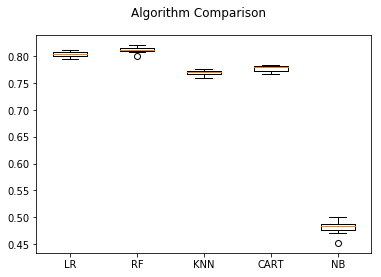

In [9]:
'''
************************************************************************
* Title: How to Compare Machine Learning Algorithms in Python with scikit-learn
* Author: Jason Brownlee
* Date: 01st June 2016
* Code Version: n/a
* Availability: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
* Adapted: SVC model not included 
************************************************************************
'''
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

train_new_a = train_new.values
train_labels_a = train_labels.values

seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, train_new_a, train_labels_a.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
#boxplot for comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Having applied KFold Validation to a number of possible classification algorithms, it seems that we have a strong accuracy rating from the following models:

 * Logistic Regression
 * Random Forests 
 * K Nearest Neighbour
 * Decision Tree Classifier

### Let's Look at LR First

In [10]:
train_labels = pd.Series(train_labels)

In [11]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(train_new,train_labels)

# Checking the model's accuracy
print('---- Training Data ---')
print(accuracy_score(train_labels, log.predict(train_new)))
print(confusion_matrix(train_labels, log.predict(train_new)))
print('---- Test Data ----')
print(accuracy_score(test_labels,log.predict(test_new)))
print(confusion_matrix(test_labels,log.predict(test_new)))
test_labels.value_counts()

---- Training Data ---
0.805049033122
[[18935  1208]
 [ 3742  1506]]
---- Test Data ----
0.805843976845
[[8109  520]
 [1593  661]]


Independent        8629
Non-Independent    2254
Name: holiday_package, dtype: int64

In [12]:
#Print a classification report for the test
print(metrics.classification_report(test_labels, log.predict(test_new)))

                 precision    recall  f1-score   support

    Independent       0.84      0.94      0.88      8629
Non-Independent       0.56      0.29      0.38      2254

    avg / total       0.78      0.81      0.78     10883



### What is the Problem?

**Unbalanced data means that everything is being classified as Independent, hence the high accuracy rate.**

But, our target data set is Non-Independent, so the model is no good to use if it does not classift these at all!

### Using Class Weights with LogisticRegression

In [13]:
# Fitting a logistic regression model
#when balanced there's a more even distribution 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(class_weight='balanced')
log.fit(train_new,train_labels)

# Checking the model's accuracy
print(accuracy_score(test_labels,log.predict(test_new)))
print(confusion_matrix(test_labels,log.predict(test_new)))
test_labels.value_counts()

0.730588992006
[[6062 2567]
 [ 365 1889]]


Independent        8629
Non-Independent    2254
Name: holiday_package, dtype: int64

In [14]:
#Print a classification report for the test
print(metrics.classification_report(test_labels, log.predict(test_new)))

                 precision    recall  f1-score   support

    Independent       0.94      0.70      0.81      8629
Non-Independent       0.42      0.84      0.56      2254

    avg / total       0.84      0.73      0.76     10883



Generally, the model is a **good predictor of Independent** but an **unreliable predictor of Non-Independent**, as it is not possible for us to be assured that the Non-Independent class is always correctly identifying instances.


### What weights can we apply to Logistic Regression to get the best outcome?

In [15]:
#Binary encodings for train target
train_labels_binary = train_labels.replace({'Independent': 0, 'Non-Independent': 1})


In [16]:
#Binary encodings for test target
test_labels_binary = test_labels.replace({'Independent': 0, 'Non-Independent': 1})

For weight 1
0.833817486545
For weight 5
0.833490284665
For weight 10
0.832964777057
For weight 20
0.832056642738
For weight 50
0.830076567502
For weight 100
0.82816302263
For weight 10000
0.820768383537


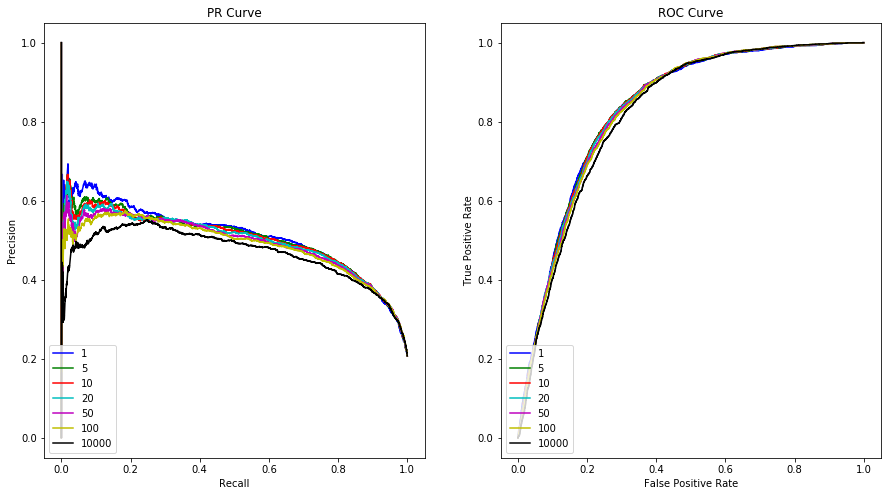

In [17]:
#Compute ROC curve to understand if our data is actually working
'''
************************************************************************
* Title: Imbalanced data & why you should NOT use ROC curve
* Author: Kaggle (LCT14558 user)
* Date: n/a
* Code Version: n/a
* Availability: https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve 
************************************************************************
'''

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')


for w,k in zip([1,5,10,20,50,100,10000],'bgrcmykw'):
    lr_model = LogisticRegression(class_weight={0:1,1:w})
    lr_model.fit(train_new,train_labels_binary)
    pred_prob = lr_model.predict_proba(test_new)[:,1]

    #PR curve
    p,r,_ = metrics.precision_recall_curve(test_labels_binary,pred_prob)
    #ROC curve
    tpr,fpr,_ = metrics.roc_curve(test_labels_binary,pred_prob)
    
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
    
    print('For weight %d' % w),
    #Print Area Under the Curve, should be between 0.5 and 1
    print(metrics.roc_auc_score(test_labels_binary,pred_prob))
          
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()


Interestingly it seems that by just manually selecting a range of weights to boost the minority class,the model still has a similar ROC curve which is fairly good, but a poor PR curve.

In [18]:
#Lets fit the Logic Regression curve again with weights as 1

from sklearn.linear_model import LogisticRegression
log_=LogisticRegression(class_weight={0:1,1:1})
log_.fit(train_new, train_labels_binary)

# Checking the model's accuracy
print('---- Training Data ---')
print(accuracy_score(train_labels_binary, log_.predict(train_new)))
print(confusion_matrix(train_labels_binary,log_.predict(train_new)))
print(train_labels_binary.value_counts())
print('--- Test Data: ---')
print(accuracy_score(test_labels_binary,log_.predict(test_new)))
print(confusion_matrix(test_labels_binary,log_.predict(test_new)))
test_labels_binary.value_counts()

---- Training Data ---
0.805049033122
[[18935  1208]
 [ 3742  1506]]
0    20143
1     5248
Name: holiday_package, dtype: int64
--- Test Data: ---
0.805843976845
[[8109  520]
 [1593  661]]


0    8629
1    2254
Name: holiday_package, dtype: int64

In [19]:
print(metrics.classification_report(test_labels_binary, log_.predict(test_new)))

             precision    recall  f1-score   support

          0       0.84      0.94      0.88      8629
          1       0.56      0.29      0.38      2254

avg / total       0.78      0.81      0.78     10883



If we set the weights to 1, the confusion matrix improves only recall for Independent instances and precision for Non-Independent. F1 score of Non-Independent falls by a lot but at least we are not experiencing overfitting. 

### New Method - Use SMOTE to balance the data

In [11]:
#Import SMOTE
#Need to install conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio='minority')

#Fit to training data
train_new_sm, train_labels_sm = sm.fit_sample(train_new, train_labels)

In [12]:
#Convert to Series / DataFrames for use
train_labels_sm = pd.Series(train_labels_sm)
train_new_sm = pd.DataFrame(train_new_sm, columns=train_new.columns)

print(train_new_sm.shape)
print(train_labels_sm.value_counts())

(40286, 66)
Independent        20143
Non-Independent    20143
dtype: int64


### Try the algorithm comparison with SMOTE sampling

LR: 0.769156 (0.048448)
RF: 0.883564 (0.055938)
KNN: 0.746358 (0.163409)
CART: 0.840994 (0.056984)


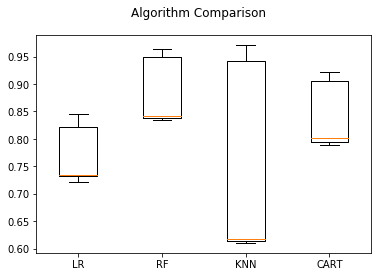

In [22]:
'''
************************************************************************
* Title: How to Compare Machine Learning Algorithms in Python with scikit-learn
* Author: Jason Brownlee
* Date: 01st June 2016
* Code Version: n/a
* Availability: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
* Adapted: Only LR, RF, and CART models used for comparison
************************************************************************
'''

seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))


#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, train_new_sm, train_labels_sm.values.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    
#boxplot for comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### KNN with SMOTE balanced data

In [23]:
#default KNN 
'''
************************************************************************
* Title: K-nearest Neighbors (KNN) Classification Model
* Author: Ritchie Ng
* Date: n/a
* Code Version: n/a
* Availability: http://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/ 
************************************************************************
'''
knnDef = KNeighborsClassifier()
knnDef.fit(train_new_sm, train_labels_sm)
y_prediction = knnDef.predict(test_new)

print('***ACCURACY***')
print(metrics.accuracy_score(test_labels, y_prediction))
print('***CONFUSION MATRIX***')
print(confusion_matrix(test_labels,y_prediction))
# training vs testing evaluation
print('------ Training Classification Report -------')
print(metrics.classification_report(train_labels_sm, knnDef.predict(train_new_sm)))

print('------- Testing Classification Report -------')
print(metrics.classification_report(test_labels, y_prediction))

***ACCURACY***
0.600477809428
***CONFUSION MATRIX***
[[4746 3883]
 [ 465 1789]]
------ Training Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.98      0.65      0.78     20143
Non-Independent       0.74      0.99      0.84     20143

    avg / total       0.86      0.82      0.81     40286

------- Testing Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.91      0.55      0.69      8629
Non-Independent       0.32      0.79      0.45      2254

    avg / total       0.79      0.60      0.64     10883



Accuracy is very low so we will try to find an optimal number for n_neighbors parameter

In [24]:
#knn best k selection
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_new_sm, train_labels_sm.values.ravel())
    y_pred = knn.predict(test_new)
    scores.append(metrics.accuracy_score(test_labels, y_pred))

Text(0,0.5,'Testing Accuracy')

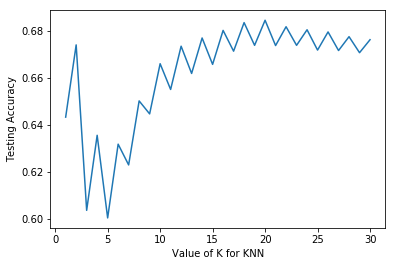

In [25]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [26]:
scores

[0.64329688505007809,
 0.67398695212717086,
 0.60369383442065605,
 0.63557842506661766,
 0.60047780942754758,
 0.63181108150326193,
 0.62298998437930719,
 0.65018836717816775,
 0.64467518147569602,
 0.66599283285858679,
 0.65505834788201778,
 0.6734356335569236,
 0.661857943581733,
 0.6769273178351557,
 0.66571717357346316,
 0.68014334282826427,
 0.67132224570430943,
 0.68345125424974729,
 0.67380317927042177,
 0.68446200496186715,
 0.67371129284204723,
 0.68170541211063129,
 0.67380317927042177,
 0.68041900211338791,
 0.67178167784618215,
 0.67950013782964258,
 0.67159790498943306,
 0.67747863640540296,
 0.67067904070568773,
 0.67619222640815957]

In [27]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(train_new_sm, train_labels_sm)
y_predict = knn.predict(test_new)

print('***ACCURACY***')
print(metrics.accuracy_score(test_labels, y_predict))
print('***CONFUSION MATRIX***')
print(confusion_matrix(test_labels,y_predict))

***ACCURACY***
0.681705412111
***CONFUSION MATRIX***
[[5435 3194]
 [ 270 1984]]


In [28]:
# training vs testing evaluation
print('------ Training Classification Report -------')
print(metrics.classification_report(train_labels_sm, knn.predict(train_new_sm)))

print('------- Testing Classification Report -------')
print(metrics.classification_report(test_labels, y_predict))

------ Training Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.93      0.64      0.76     20143
Non-Independent       0.72      0.95      0.82     20143

    avg / total       0.83      0.79      0.79     40286

------- Testing Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.95      0.63      0.76      8629
Non-Independent       0.38      0.88      0.53      2254

    avg / total       0.83      0.68      0.71     10883



### Feature Selection using RFE

In [29]:
#Feature selection - following code adapted to RFE rather than RFECV and new loop added to save features into features2 dictionary
'''
************************************************************************
* Title: Select Features RFECV
* Author: cast42
* Date: n/a
* Code Version: n/a
* Availability: https://www.kaggle.com/cast42/select-features-rfecv/code 
************************************************************************
'''

from sklearn.feature_selection import RFE  

classifiers = []
features2 = {}
classifiers.append(('RF', RandomForestClassifier()))
classifiers.append(('CART', DecisionTreeClassifier()))
classifiers.append(('LR', LogisticRegression()))

for name, classifier in classifiers:
    selector = RFE(estimator=classifier) #, scoring='accuracy'
    selector.fit(train_new_sm, train_labels_sm)

    print('The optimal number of features for %s' % (name), 'is {}'.format(selector.n_features_))
    features2[name] = [f for f,s in zip(train_new_sm.columns, selector.support_) if s]
    print('The selected features are:')
    print ('{}'.format(features2[name]))
    print('--------------------------------------------------------------------------------------')

The optimal number of features for RF is 33
The selected features are:
['Age_ 0-15', 'Age_16-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65 & over', 'Sex_Female', 'Sex_Male', 'country_France', 'country_Germany', 'country_Irish Republic', 'country_Italy', 'country_Netherlands', 'country_Poland', 'country_Portugal', 'country_Spain', 'duration_1 - 3 Nights', 'duration_28 - 90 Nights', 'duration_4 - 13 Nights', 'mode_of_transport_Air', 'mode_of_transport_Tunnel', 'purpose_of_travel_Business', 'purpose_of_travel_Holiday', 'purpose_of_travel_VFR', 'quarter_Apr-Jun', 'quarter_Jan-Mar', 'quarter_Jul-Sep', 'quarter_Oct-Dec', 'weighted_visits', 'weighted_nights', 'weighted_spend', 'Year']
--------------------------------------------------------------------------------------
The optimal number of features for CART is 33
The selected features are:
['Age_ 0-15', 'Age_16-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65 & over', 'Sex_Female', 'Sex_Male', 'country_Den

### Testing LR, RF and CART with Feature Selection and SMOTE sampling

In [30]:
#code inspired by Jason Brownlee (https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)

fs_models = []
fs_models.append(('LR', LogisticRegression()))
fs_models.append(('RF', RandomForestClassifier()))
fs_models.append(('CART', DecisionTreeClassifier()))


for name, model in fs_models:
        
    resultss = model
    resultss.fit(train_new_sm[features2[name]], train_labels_sm.values)
    
    fs_pred = resultss.predict(test_new[features2[name]])
    print('%s: %f' % (name, accuracy_score(test_labels, fs_pred)))

LR: 0.737480
RF: 0.800331
CART: 0.760176


We now make a similar loop to see what the accuracy of these three models is without feature selection, for comparison.

In [31]:
all_models = []
all_models.append(('LR', LogisticRegression()))
all_models.append(('RF', RandomForestClassifier()))
all_models.append(('CART', DecisionTreeClassifier()))

for name, model in all_models:
    
    results_all_features = model
    results_all_features.fit(train_new_sm, train_labels_sm)
    
    pred_all_features = results_all_features.predict(test_new)
    print('%s: %f' % (name, accuracy_score(test_labels, pred_all_features)))

LR: 0.741891
RF: 0.810346
CART: 0.775521


Summary: There is no major improvement when Feature Selection is applied to SMOTE, in fact accuracy scores are slightly lower.

# Parameter Tuning
#### Decision Tree

In [32]:
#tranforming labels to binary - 0 and 1
train_labels_binary_sm = train_labels_sm.replace({'Independent': 0, 'Non-Independent': 1})
train_labels_binary_sm = pd.Series(train_labels_binary_sm)

test_labels_binary = test_labels.replace({'Independent': 0, 'Non-Independent': 1})
test_labels_binary = pd.Series(test_labels_binary)

In [33]:
#original without parameters - random_state is set randomly as 7 
dtree_model = DecisionTreeClassifier(random_state=7)
dtree_model.fit(train_new_sm, train_labels_binary_sm)
predDT = dtree_model.predict(test_new)

# Evaluate accuracy for both, training and testing data
print('---- Training Data ---')
print('------ Accuracy -----')
print(accuracy_score(train_labels_binary_sm, dtree_model.predict(train_new_sm)))
print('------ Confusion matrix -----')
print(confusion_matrix(train_labels_binary_sm, dtree_model.predict(train_new_sm)))
print()
print('---- Testing Data ---')
print('------ Accuracy -----')
print(accuracy_score(test_labels_binary, predDT))
print('------ Confusion matrix -----')
print(confusion_matrix(test_labels_binary,predDT))

---- Training Data ---
------ Accuracy -----
0.999975177481
------ Confusion matrix -----
[[20143     0]
 [    1 20142]]

---- Testing Data ---
------ Accuracy -----
0.780483322613
------ Confusion matrix -----
[[7239 1390]
 [ 999 1255]]


In [34]:
#Print a classification report for the training
print('------ Training Classification Report -------')
print(metrics.classification_report(train_labels_binary_sm, dtree_model.predict(train_new_sm)))
#Print a classification report for the test
print('------- Testing Classification Report -------')
print(metrics.classification_report(test_labels_binary, predDT))

------ Training Classification Report -------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     20143
          1       1.00      1.00      1.00     20143

avg / total       1.00      1.00      1.00     40286

------- Testing Classification Report -------
             precision    recall  f1-score   support

          0       0.88      0.84      0.86      8629
          1       0.47      0.56      0.51      2254

avg / total       0.80      0.78      0.79     10883



Looking at the accuracy of ~0.78, the model looks pretty capable of predicting better than by chance. Generally, 'independent' is predicted with considerably high accuracy, on the other hand, the precision for 'non-independent' is far from ideal. 

Another issue that could be observed is overfitting. The model predicted training data almost perfectly, only one 'independent value' was incorrectly classified as 'non-independent'. Overfitting is a side effect of decision trees and could be reduced by parameter tuning such as setting minimum number of samples at a leaf node or optimising maximum depth of the tree

In [35]:
#max depth 
#using AUC score
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels_binary, predDT)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.69785160911447475

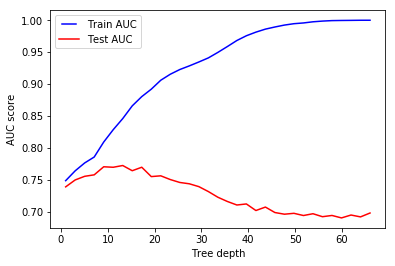

[0.73883246204607289, 0.74966560008999594, 0.75537813668298115, 0.75766780433245318, 0.77031428038774363, 0.76954743311564788, 0.77228196472903576, 0.76413160960394078, 0.76958306336436133, 0.75492951946054265, 0.75613169330674723, 0.75027987483242731, 0.74571922870434537, 0.74364023196988582, 0.73920071840452994, 0.7314882348713091, 0.72258056986392538, 0.71592452577578569, 0.71039227412813089, 0.71204630431029348, 0.70173977928577635, 0.70716138692876818, 0.69858794188063755, 0.69598395168353189, 0.69736466238205641, 0.69390495494907234, 0.69672082430194782, 0.69206243920878019, 0.69400269391415814, 0.6901555268068521, 0.69467812620470593, 0.69176451788674487, 0.69785160911447475]


In [36]:
max_depths = np.linspace(1, 66, 33, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(random_state = 7, max_depth=max_depth)
    dt.fit(train_new_sm, train_labels_binary_sm)
    train_pred = dt.predict(train_new_sm)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels_binary_sm, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(test_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels_binary, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

print(test_results)

The graph clearly shows that our model is overfitting. The blue line for train data is almost exemplary and the red line goes the opposite direction. Out of these values, 13 seems to be a great fit to imrove AUC. Let's see what effect it has on our model.

In [37]:
dtree_model1 = DecisionTreeClassifier(max_depth = 13, random_state = 7)
dtree_model1.fit(train_new_sm, train_labels_binary_sm)
predDT1 = dtree_model1.predict(test_new)
# Evaluate accuracy
print('------ Accuracy -----')
print(accuracy_score(test_labels_binary, predDT1))
print('------ Confusion matrix -----')
print(confusion_matrix(test_labels_binary,predDT1))
print('------ Report -----')
print(metrics.classification_report(test_labels_binary, predDT1))

------ Accuracy -----
0.735826518423
------ Confusion matrix -----
[[6127 2502]
 [ 373 1881]]
------ Report -----
             precision    recall  f1-score   support

          0       0.94      0.71      0.81      8629
          1       0.43      0.83      0.57      2254

avg / total       0.84      0.74      0.76     10883



Overall accuracy of the model decreased, however, precision for 'independent' and recall for 'non-independent' increased to high numbers.F1 score for 'independent' decreased slightly and increased for 'non-independent'. 
There might be an option for finding better accuracy with max_depth parameter so we created a loop that would exactly look for that.

In [38]:
max_depths = np.linspace(1, 66, 66, endpoint=True)
test_results = []

for max_depth in max_depths:
    dt2 = DecisionTreeClassifier(random_state = 7, max_depth=max_depth)
    dt2.fit(train_new_sm, train_labels_binary_sm)
    test_pred = dt2.predict(test_new)
    acc= accuracy_score(test_labels_binary, test_pred)
    test_results.append(acc)

print('------ Accuracy scores -----')
print(test_results)

------ Accuracy scores -----
[0.66874942570982265, 0.68905632638059355, 0.70100156206928232, 0.6978774235045484, 0.69732610493430125, 0.70513645134613623, 0.70173665349627856, 0.70164476706790402, 0.71763300560507215, 0.73196728843149872, 0.73876688413121383, 0.73757236056234499, 0.73582651842322888, 0.73509142699623264, 0.74915005053753558, 0.75089589267665169, 0.75337682624276392, 0.75098777910502623, 0.75300928052926586, 0.7576954883763668, 0.75907378480198473, 0.75889001194523564, 0.75889001194523564, 0.75925755765873382, 0.75815492051823941, 0.76127905908297344, 0.76109528622622435, 0.76256546908021683, 0.76523017550307815, 0.76532206193145269, 0.76495451621795463, 0.76458697050445645, 0.76486262978958008, 0.76954883763668103, 0.76964072406505557, 0.77230543048791689, 0.77074336120554998, 0.77055958834880089, 0.77570522833777455, 0.77267297620141506, 0.77469447762565469, 0.77754295690526509, 0.77809427547551224, 0.77157033906092065, 0.77515390976752729, 0.77818616190388679, 0.7741

Values 65 and 66 seems to have the highest accuracy of ~0.7804, which is exactly the same as the accuracy of the model without parameter tuning.

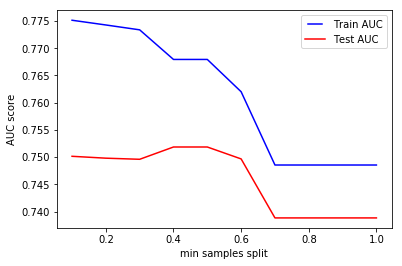

[0.75014838224788938, 0.74980246548981633, 0.74959878694684556, 0.75185632053362494, 0.75185632053362494, 0.74966560008999594, 0.73883246204607289, 0.73883246204607289, 0.73883246204607289, 0.73883246204607289]


In [39]:
#min_samples_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt3 = DecisionTreeClassifier(random_state = 7, min_samples_split=min_samples_split)
    dt3.fit(train_new_sm, train_labels_binary_sm)
    train_pred = dt3.predict(train_new_sm)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels_binary_sm, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt3.predict(test_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels_binary, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()
print(test_results)

In [40]:
dtree_model2 = DecisionTreeClassifier(random_state = 7, min_samples_split=0.4) 
dtree_model2.fit(train_new_sm, train_labels_binary_sm)
predDT2 = dtree_model2.predict(test_new)
# Evaluate accuracy

print('------ Accuracy -----')
print(accuracy_score(test_labels_binary, predDT2))
print('------ Confusion matrix -----')
print(confusion_matrix(test_labels_binary,predDT2))
print('------ Report -----')
print(metrics.classification_report(test_labels_binary, dtree_model2.predict(test_new)))

------ Accuracy -----
0.711752274189
------ Confusion matrix -----
[[5897 2732]
 [ 405 1849]]
------ Report -----
             precision    recall  f1-score   support

          0       0.94      0.68      0.79      8629
          1       0.40      0.82      0.54      2254

avg / total       0.83      0.71      0.74     10883



Accuracy fell by quite a lot but now recall is similar for both classes in its 70s and precision for non-independent is high. However, precision of non-indpendent remains low. 
Let's try to find what number would give us best accuracy rather than AUC score. We are now looking for an integer, not a float, to examine the effect.

In [41]:
min_samples_splits = [5,10,15,20,25,30,35,40,45,50,55,60]
test_results = []

for min_samples_split in min_samples_splits:
    dt4 = DecisionTreeClassifier(random_state = 7, min_samples_split=min_samples_split)
    dt4.fit(train_new_sm, train_labels_binary_sm)
    test_pred = dt4.predict(test_new)
    acc= accuracy_score(test_labels_binary, test_pred)
    test_results.append(acc)

print('------ Accuracy scores -----')
print(test_results)

------ Accuracy scores -----
[0.78287236975098773, 0.78728291831296515, 0.78774235045483787, 0.7913259211614444, 0.78930441973720478, 0.79233667187356427, 0.79150969401819349, 0.79325553615730959, 0.78994762473582647, 0.78856932831020854, 0.78948819259395386, 0.78820178259671048]


In [43]:
dtree_model6 = DecisionTreeClassifier(random_state = 7, min_samples_split=40) 
dtree_model6.fit(train_new_sm, train_labels_binary_sm)
predDT6 = dtree_model6.predict(test_new)
# Evaluate accuracy

print('------ Accuracy -----')
print(accuracy_score(test_labels_binary, predDT6))
print('------ Confusion matrix -----')
print(confusion_matrix(test_labels_binary,predDT6))
print('------ Report -----')
print(metrics.classification_report(test_labels_binary, dtree_model6.predict(test_new)))

------ Accuracy -----
0.793255536157
------ Confusion matrix -----
[[7321 1308]
 [ 942 1312]]
------ Report -----
             precision    recall  f1-score   support

          0       0.89      0.85      0.87      8629
          1       0.50      0.58      0.54      2254

avg / total       0.81      0.79      0.80     10883



A change from a float to 40 (optimal integer) not only increased accuracy but also precision for 'non-independent'. However, recall for 'non-independent' decreased and F1 score for 'non-independent' remained 0.54 with increased 'independent'.

Summary: float parameter seemed to be great for recall and an integer for accuracy and precision.

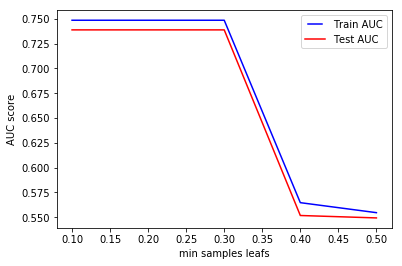

[0.73883246204607289, 0.73883246204607289, 0.73883246204607289, 0.55172668915399803, 0.54928807369713339]


In [44]:
#min_samples_leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt5 = DecisionTreeClassifier(random_state = 7, min_samples_leaf=min_samples_leaf)
    dt5.fit(train_new_sm, train_labels_binary_sm)
    train_pred = dt5.predict(train_new_sm)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels_binary_sm, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt5.predict(test_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels_binary, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leafs')
plt.show()
print(test_results)

In [45]:
dtree_model7 = DecisionTreeClassifier(random_state = 7, min_samples_leaf=0.3) 
dtree_model7.fit(train_new_sm, train_labels_binary_sm)
predDT7 = dtree_model7.predict(test_new)
# Evaluate accuracy

print('------ Accuracy -----')
print(accuracy_score(test_labels_binary, predDT7))
print('------ Confusion matrix -----')
print(confusion_matrix(test_labels_binary,predDT7))
print('------ Report -----')
print(metrics.classification_report(test_labels_binary, dtree_model7.predict(test_new)))

------ Accuracy -----
0.66874942571
------ Confusion matrix -----
[[5343 3286]
 [ 319 1935]]
------ Report -----
             precision    recall  f1-score   support

          0       0.94      0.62      0.75      8629
          1       0.37      0.86      0.52      2254

avg / total       0.82      0.67      0.70     10883



Best values for AUC score were 0.1, 0.2 and 0.3. From their identical classification report it is clear that precision for 'independent' and especially recall for 'non-independent' was greatly increased. However, other metrics decreased including overall F1 score that dropped from 0.79 to 0.70.
So let's try to use integers to find best accuracy:

In [46]:
min_samples_leafs = [2,3,4,5,6,7,8,9,10,12,14,16,18,20]
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt6 = DecisionTreeClassifier(random_state = 7, min_samples_leaf=min_samples_leaf)
    dt6.fit(train_new_sm, train_labels_binary_sm)
    test_pred = dt6.predict(test_new)
    acc= accuracy_score(test_labels_binary, test_pred)
    test_results.append(acc)

print('------ Accuracy scores -----')
print(test_results)

------ Accuracy scores -----
[0.79013139759257556, 0.78489387117522746, 0.79316364972893505, 0.79040705687769919, 0.79196912616006621, 0.79141780758981894, 0.79353119544243311, 0.79518515115317467, 0.79307176330056051, 0.79086648901957179, 0.7891206468804558, 0.7873748047413397, 0.78691537259946709, 0.78342368832123499]


In [47]:
dtree_model9 = DecisionTreeClassifier(random_state = 7, min_samples_leaf=9) 
dtree_model9.fit(train_new_sm, train_labels_binary_sm)
predDT9 = dtree_model9.predict(test_new)
# Evaluate accuracy

print('------ Accuracy -----')
print(accuracy_score(test_labels_binary, predDT9))
print('------ Confusion matrix -----')
print(confusion_matrix(test_labels_binary,predDT9))
print('------ Report -----')
print(metrics.classification_report(test_labels_binary, dtree_model9.predict(test_new)))

------ Accuracy -----
0.795185151153
------ Confusion matrix -----
[[7322 1307]
 [ 922 1332]]
------ Report -----
             precision    recall  f1-score   support

          0       0.89      0.85      0.87      8629
          1       0.50      0.59      0.54      2254

avg / total       0.81      0.80      0.80     10883



The effect of using a float that identifies best AUC score and best integer for highest accuracy is exactly the same as with min_samples_slit. First one is good for precision of I and recall of N.I. Second one is overall good for I and increases precesion of N.I; an overall accuracy.

In [49]:
#max_features
max_features = [10,20,30,40,45,50,52,54,55,56,58,60,65]
test_results = []

for max_feature in max_features:
    dt8 = DecisionTreeClassifier(random_state = 7, max_features=max_feature)
    dt8.fit(train_new_sm, train_labels_binary_sm)
    test_pred = dt8.predict(test_new)
    acc= accuracy_score(test_labels_binary, test_pred)
    test_results.append(acc)

print('------ Accuracy scores -----')
print(test_results)

------ Accuracy scores -----
[0.76412753836258385, 0.77377561334190936, 0.77175411191766974, 0.78250482403748967, 0.78140218689699537, 0.77644031976477079, 0.78140218689699537, 0.78140218689699537, 0.78305614260773682, 0.78176973261049343, 0.77248920334466598, 0.77616466047964716, 0.77193788477441883]


Looking to increase accuracy we used the loop to find best performing integer. Number 55 showed to be the best out of the options, however, the results are not significantly improved. Indeed, they are almost the same as our default model.

#### Trying Random Forests with SMOTE and no parameters

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Create a random forest Classifier.
clf = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train_new_sm, train_labels_sm)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
predsB = clf.predict(test_new)

# Evaluate accuracy with a 5 fold cross validation
print('------ 5 KFold Validation -----')
print(cross_val_score(clf, train_new_sm, train_labels_sm, cv=5))

# Checking the model's accuracy
print('---- Training Data ---')
print(accuracy_score(train_labels_sm, clf.predict(train_new_sm)))
print(confusion_matrix(train_labels_sm,clf.predict(train_new_sm)))
print(train_labels_sm.value_counts())
print('--- Test Data: ---')
print(accuracy_score(test_labels, predsB))
print(confusion_matrix(test_labels,predsB))
test_labels.value_counts()

------ 5 KFold Validation -----
[ 0.78021842  0.87180442  0.91685282  0.91819762  0.9153426 ]
---- Training Data ---
0.99483691605
[[20083    60]
 [  148 19995]]
Independent        20143
Non-Independent    20143
dtype: int64
--- Test Data: ---
0.807130386842
[[7631  998]
 [1101 1153]]


Independent        8629
Non-Independent    2254
Name: holiday_package, dtype: int64

#### Problem : This has overfit to the Training data

In [34]:
#Print a classification report for the training
print('------ Training Classification Report -------')
print(metrics.classification_report(train_labels_sm, clf.predict(train_new_sm)))
#Print a classification report for the test
print('------- Testing Classification Report -------')
print(metrics.classification_report(test_labels, clf.predict(test_new)))


------ Training Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.99      1.00      0.99     20143
Non-Independent       1.00      0.99      0.99     20143

    avg / total       0.99      0.99      0.99     40286

------- Testing Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.87      0.88      0.88      8629
Non-Independent       0.54      0.51      0.52      2254

    avg / total       0.80      0.81      0.81     10883



In [35]:
#Find parameters of model
print(clf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Random Forest Parameter Tuning 

First, we do some initial parameter tuning using the following parameters which should help to reduce *overfitting*:

 * n_estimators : Number of decision trees to be used
 * max_features : Number of features used (if float, percentage of features used)
 * max_depth : Maximum depth of the tree. If none, nodes expand until all leaves are pure. Increasing this will reduce complexity of the model.
 * min_samples_leaf : The minimum number of samples required to be a leaf node. 

Finding the best possible values for max_depth, n_features, min_sample_leaf and n_estimators. Using GridSearchCV with this many possible parameters was computationally infeasable.

Using Grid Search to find the best combination of parameters:

In [15]:
from sklearn.ensemble import RandomForestClassifier

for max_depth in (9, 11, 13, 15, 17, 19, 21):

    clf2 = RandomForestClassifier(max_depth = max_depth)
    clf2.fit(train_new_sm, train_labels_sm)
    
    predsA = clf2.predict(train_new_sm)
    predsB = clf2.predict(test_new)
    
    print('%d: %.4f' % (max_depth, accuracy_score(train_labels_sm, predsA)))
    print('Test: %.4f' % (accuracy_score(test_labels, predsB)))
    print('Test f1 score: %.4f' % (metrics.f1_score(test_labels, predsB, pos_label = 'Non-Independent')))


9: 0.7994
Test: 0.7207
Test f1 score: 0.5516
11: 0.8145
Test: 0.7338
Test f1 score: 0.5638
13: 0.8415
Test: 0.7434
Test f1 score: 0.5706
15: 0.8560
Test: 0.7560
Test f1 score: 0.5833
17: 0.8768
Test: 0.7624
Test f1 score: 0.5828
19: 0.8793
Test: 0.7636
Test f1 score: 0.5843
21: 0.9073
Test: 0.7783
Test f1 score: 0.5890


In [16]:
for n_estimators in (5, 10, 15, 20, 25, 30, 35):

    clf3 = RandomForestClassifier(n_estimators = n_estimators)

    clf3.fit(train_new_sm, train_labels_sm)
    
    predsA = clf3.predict(train_new_sm)
    predsB = clf3.predict(test_new)
    
    print('%d: %.4f' % (n_estimators, accuracy_score(train_labels_sm, predsA)))
    print('Test: %.4f' % (accuracy_score(test_labels, predsB)))
    print('Test f1 score: %.4f' % (metrics.f1_score(test_labels, predsB, pos_label = 'Non-Independent')))

5: 0.9865
Test: 0.7914
Test f1 score: 0.5215
10: 0.9954
Test: 0.8116
Test f1 score: 0.5266
15: 0.9976
Test: 0.8069
Test f1 score: 0.5580
20: 0.9990
Test: 0.8152
Test f1 score: 0.5526
25: 0.9995
Test: 0.8135
Test f1 score: 0.5661
30: 0.9997
Test: 0.8163
Test f1 score: 0.5619
35: 0.9999
Test: 0.8148
Test f1 score: 0.5722


In [17]:
train_new_sm.shape

(40286, 66)

In [18]:
import math

#'auto': max_features=sqrt(n_features)
x = math.sqrt(66)
#If int, take no. of features 
x = int(round(x))

for max_features in (x, 0.3, 0.4, 0.5, 0.6):

    clf4 = RandomForestClassifier(max_features = max_features)

    clf4.fit(train_new_sm, train_labels_sm)
    
    predsA = clf4.predict(train_new_sm)
    predsB = clf4.predict(test_new)
    
    print('%.2f: %.4f' % (max_features, accuracy_score(train_labels_sm, predsA)))
    print('Test: %.4f' % (accuracy_score(test_labels, predsB)))
    print('Test f1 score: %.4f' % (metrics.f1_score(test_labels, predsB, pos_label = 'Non-Independent')))

8.00: 0.9958
Test: 0.8062
Test f1 score: 0.5171
0.30: 0.9948
Test: 0.8189
Test f1 score: 0.5584
0.40: 0.9952
Test: 0.8212
Test f1 score: 0.5660
0.50: 0.9954
Test: 0.8219
Test f1 score: 0.5712
0.60: 0.9948
Test: 0.8194
Test f1 score: 0.5594


In [19]:
for min_samples_leaf in (1, 2, 3, 4, 5):
# Create a random forest Classifier.
    clf5 = RandomForestClassifier(min_samples_leaf = min_samples_leaf)

    clf5.fit(train_new_sm, train_labels_sm)
    
    predsA = clf5.predict(train_new_sm)
    predsB = clf5.predict(test_new)
    
    print('%d: %.4f' % (min_samples_leaf, accuracy_score(train_labels_sm, predsA)))
    print('Test: %.4f' % (accuracy_score(test_labels, predsB)))
    print('Test f1 score: %.4f' % (metrics.f1_score(test_labels, predsB, pos_label = 'Non-Independent')))

1: 0.9954
Test: 0.8070
Test f1 score: 0.5177
2: 0.9590
Test: 0.8081
Test f1 score: 0.5831
3: 0.9329
Test: 0.8047
Test f1 score: 0.5887
4: 0.9193
Test: 0.8015
Test f1 score: 0.5952
5: 0.9059
Test: 0.8018
Test f1 score: 0.5999


Using Grid Search to find the best combination of parameters:

In [20]:
#Note: This takes quite a lot of time to run!
from sklearn.model_selection import GridSearchCV
parameter_candidates = [
    {'n_estimators' : [20, 25, 30],'max_depth' : [17, 19, 21],
    'max_features' : [0.4, 0.6], 'min_samples_leaf' :[3, 4, 5]}
]

clrf = GridSearchCV(RandomForestClassifier(), parameter_candidates, n_jobs=1)

clrf.fit(train_new_sm, train_labels_sm)

print('Best score for model:', clrf.best_score_)
print('Best n_estimators:', clrf.best_estimator_.n_estimators)
print('Best max_depth:', clrf.best_estimator_.max_depth)
print('Best max_features:', clrf.best_estimator_.max_features)
print('Best min_samples_leaf:', clrf.best_estimator_.min_samples_leaf)


Best score for model: 0.854937199027
Best n_estimators: 30
Best max_depth: 21
Best max_features: 0.4
Best min_samples_leaf: 3


In [22]:
from sklearn.model_selection import cross_val_score
# Create a random forest Classifier.
clf = RandomForestClassifier(n_estimators = 25, max_features = 0.6, max_depth = 21, min_samples_leaf = 3 )

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train_new_sm, train_labels_sm)

# Apply the Classifier we trained to the test data
predsB = clf.predict(test_new)


# Evaluate accuracy with a 5 fold cross validation
print('------ 5 KFold Validation -----')
print(cross_val_score(clf, train_new_sm, train_labels_sm, cv=5))


# Checking the model's accuracy
print('---- Training Data ---')
print(accuracy_score(train_labels_sm, clf.predict(train_new_sm)))
print(confusion_matrix(train_labels_sm,clf.predict(train_new_sm)))
print(train_labels_sm.value_counts())
print('--- Test Data: ---')
print(accuracy_score(test_labels, predsB))
print(confusion_matrix(test_labels,predsB))
test_labels.value_counts()

------ 5 KFold Validation -----
[ 0.80776868  0.85554728  0.87937453  0.8730139   0.87624131]
---- Training Data ---
0.899021992752
[[16555  3588]
 [  480 19663]]
Independent        20143
Non-Independent    20143
dtype: int64
--- Test Data: ---
0.787374804741
[[6805 1824]
 [ 490 1764]]


Independent        8629
Non-Independent    2254
Name: holiday_package, dtype: int64

In [23]:
#Print a classification report for the training
print('------ Training Classification Report -------')
print(metrics.classification_report(train_labels_sm, clf.predict(train_new_sm)))
#Print a classification report for the test
print('------- Testing Classification Report -------')
print(metrics.classification_report(test_labels, clf.predict(test_new)))

------ Training Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.97      0.82      0.89     20143
Non-Independent       0.85      0.98      0.91     20143

    avg / total       0.91      0.90      0.90     40286

------- Testing Classification Report -------
                 precision    recall  f1-score   support

    Independent       0.93      0.79      0.85      8629
Non-Independent       0.49      0.78      0.60      2254

    avg / total       0.84      0.79      0.80     10883

